In [1]:
%load_ext autoreload

%autoreload 2

# $[0,1] \times [0,1]$ games

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from itertools import product

# to write general code for arbitrary regularizer and game; now quick and dirty

In [3]:
import legendre
import sympy as sp

x = sp.symbols('x', positive=True)
y = sp.symbols('y')

simvars = [x,y]

## Kernels

In [4]:
#---------------------------------------------------------------------
# Define (symbolic) kernel functions andtheir labels
#---------------------------------------------------------------------

# 0 = sha
# 1 = log barrier
# 2 = q-replicator
# 3 = q-replicator

# q-replicator parameters
Q = [] # [0.5, 1.5] #, 2.5]

# Kiwiel kernel parameter; very similar to q-replicator
kiw = 0.5

# Teboulle kernel --> very similar to q-replicator

# sympy expressions
simkernels = [
    x * sp.log(x),
    (x**2 - x)/4,
    x * sp.log(x) - x,
    - (x**kiw) / kiw] + [(x - x**q) / ( 1-q ) for q in Q ]

# kernel labels
kerlabels = ["Sha", "Eu",  "Bolt", "Kiw"] + [f"q = {q} Sha" for q in Q]
#---------------------------------------------------------------------

# simkernels = simkernel + [  - sp.log(x) ]
# reglabels = reglabels  + [ "log" ]

## Regularizers

In [5]:
#---------------------------------------------------------------------
# Define additional (symbolic) regularizer functions functions and their labels
#---------------------------------------------------------------------
simregs = [] # [ 1/2 * sp.log(x-1) + - x * sp.atanh(1-2*x) ]
reglabels_tmp = [] # [ "atanh" ]

In [6]:
for i, h in enumerate(simregs):
    print(reglabels_tmp[i], ":", h)

In [7]:
reglabels = kerlabels + reglabels_tmp

In [8]:
# Init class
A = legendre.LinFTRL(simkernels = simkernels, reglabels = reglabels, radius = 1, sim_manual_regularizers = simregs)

hello world!


In [9]:
for i, h in enumerate(A.simregularizers):
    print(i+1, ":", reglabels[i], ":", h)

1 : Sha : x*log(x) + (1 - x)*log(1 - x)
2 : Eu : x**2/4 + (1 - x)**2/4 - 1/4
3 : Bolt : x*log(x) + (1 - x)*log(1 - x) - 1
4 : Kiw : -2.0*x**0.5 - 2.0*(1 - x)**0.5


## $\nabla{h}$

In [10]:
for i, Dh in enumerate(A.simregularizers1):
    print(reglabels[i], ":", Dh)

Sha : log(x) - log(1 - x)
Eu : x - 1/2
Bolt : log(x) - log(1 - x)
Kiw : -1.0/x**0.5 + 1.0/(1 - x)**0.5


In [11]:
for i, h3 in enumerate(A.simregularizers3):
    print(reglabels[i], ":", h3)

Sha : (1 - x)**(-2) - 1/x**2
Eu : 0
Bolt : (1 - x)**(-2) - 1/x**2
Kiw : -0.75/x**2.5 + 0.75/(1 - x)**2.5


## Q

In [12]:
for i, Q in enumerate(A.simchoices):
    print(reglabels[i], ":", Q)

Sha : exp(y)/(exp(y) + 1)
Eu : y + 1/2
Bolt : exp(y)/(exp(y) + 1)
Kiw : 0.5*(y**2 - 2.82842712474619*sqrt(0.125*y**4 - 0.5*y**2 - (y**2 + 1.0)**0.5 - 1))/y**2


In [13]:
for i, g in enumerate(A.simmetrics):
    print(reglabels[i], ":", g)

Sha : -1/(x*(x - 1))
Eu : 1
Bolt : -1/(x*(x - 1))
Kiw : 0.5/x**1.5 + 0.5/(1 - x)**1.5


In [14]:
for i, sh in enumerate(A.simsharps):
    print(reglabels[i], ":", sh)

Sha : x*(1 - x)
Eu : 1
Bolt : x*(1 - x)
Kiw : 2.0*x**1.5*(1 - x)**1.5/(x**1.5 + (1 - x)**1.5)


## Regularizer and its derivatives

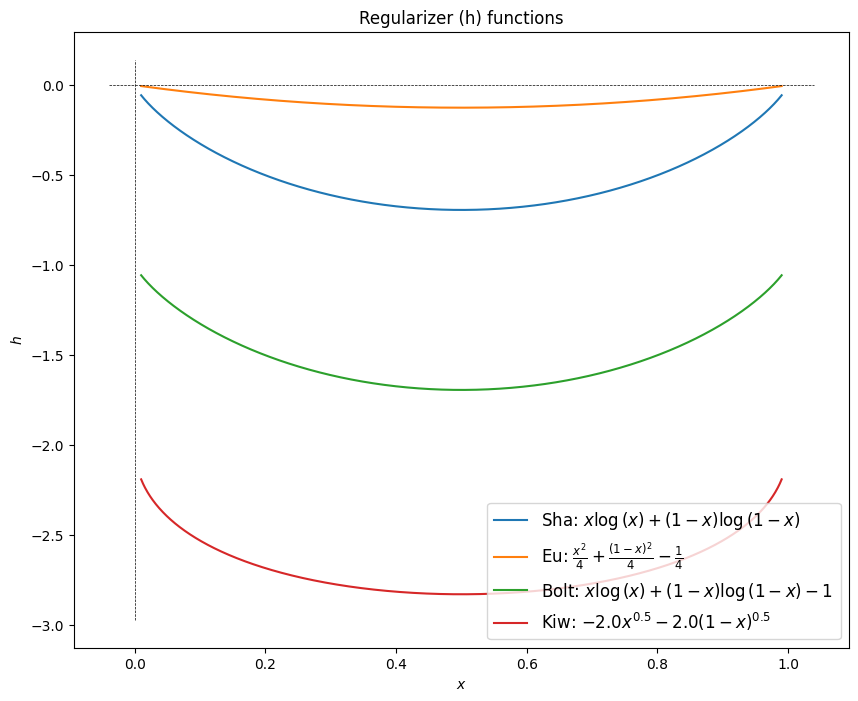

In [15]:
reg_title = 'Regularizer (h) functions'
strat_label = f"${sp.latex(x)}$"

reg_ylabel = '$h$'

ep = 1e-2

A.plot_method(A.regularizers, A.simregularizers, title = reg_title, xlabel = strat_label, ylabel = reg_ylabel, xDomain = np.linspace(ep, 1-ep, 1000), figsize = (10, 8))

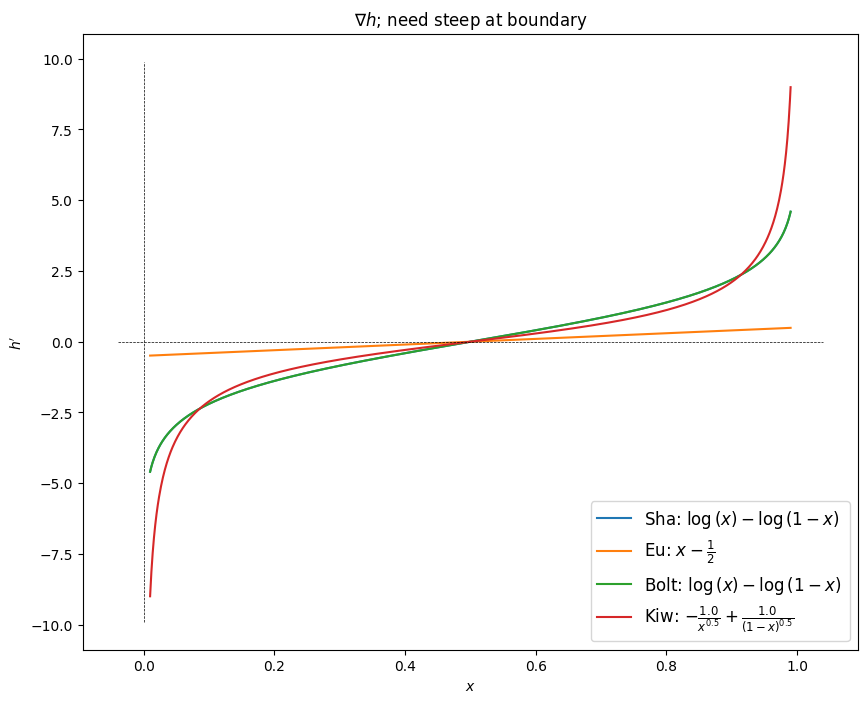

In [16]:
reg1_title = "$\\nabla h$; need steep at boundary"
strat_label = f"${sp.latex(x)}$"

reg_ylabel = "$h'$"

ep = 1e-2

A.plot_method(A.regularizers1, A.simregularizers1, title = reg1_title, xlabel = strat_label, ylabel = reg_ylabel, xDomain = np.linspace(ep, 1-ep, 1000), figsize = (10, 8))



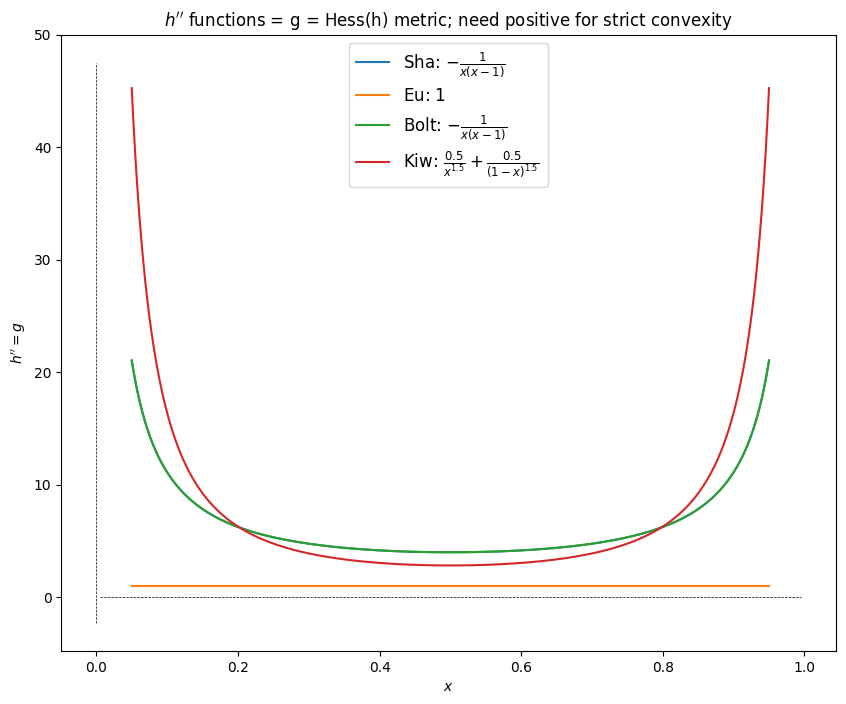

In [17]:
g_title = "$h''$ functions = g = Hess(h) metric; need positive for strict convexity"
strat_label = f"${sp.latex(x)}$"

g_ylabel = "$h'' = g$"

ep = 0.05

A.plot_method(A.metrics, A.simmetrics, title = g_title, xlabel = strat_label, ylabel = g_ylabel, xDomain = np.linspace(ep, 1-ep, 1000), figsize = (10, 8))



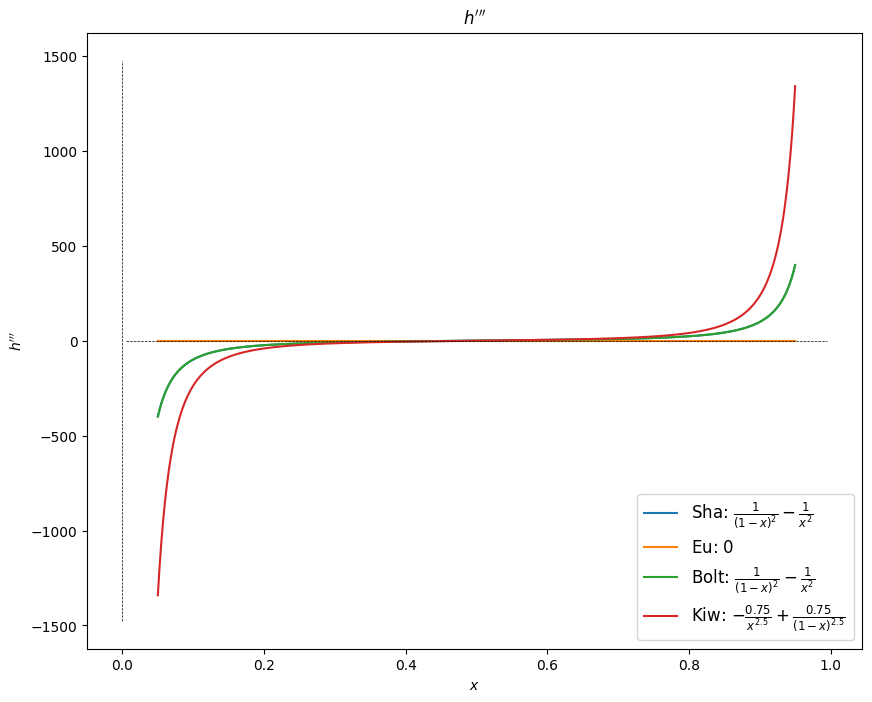

In [18]:
h3_title = "$h'''$"
strat_label = f"${sp.latex(x)}$"

h3_ylabel = "$h'''$"

ep = 0.05

A.plot_method(A.regularizers3, A.simregularizers3, title = h3_title, xlabel = strat_label, ylabel = h3_ylabel, xDomain = np.linspace(ep, 1-ep, 1000), figsize = (10, 8))



## Choice map

<lambdifygenerated-32>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.5*(y**2 - 2.82842712474619*sqrt(0.125*y**4 - 0.5*y**2 - sqrt(y**2 + 1.0) - 1))/y**2


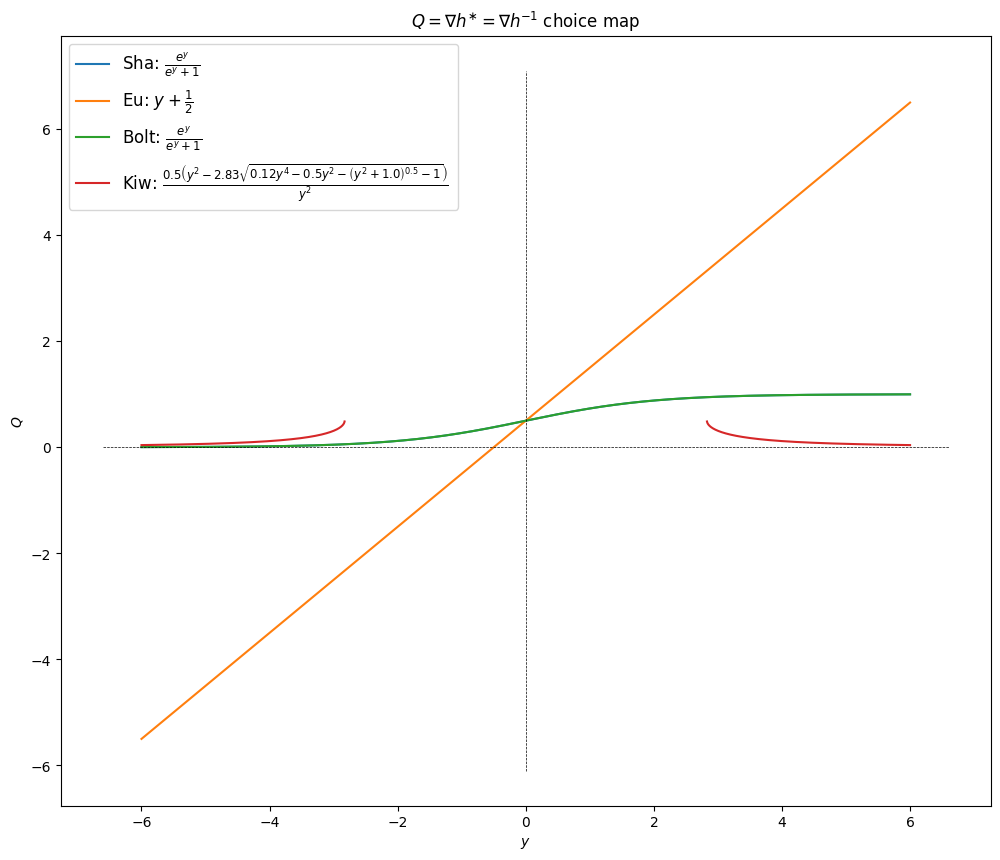

In [19]:
Q_title = "$Q = \\nabla{h^{\\ast}} = {\\nabla{h}}^{-1}$ choice map"
dual_label = f"${sp.latex(y)}$"

Q_ylabel = "$Q$"

ep = 1e-2

A.plot_method(A.choices, A.simchoices, title = Q_title, xlabel = dual_label, ylabel = Q_ylabel, xDomain = np.linspace(-6, 6, 10000), figsize = (12, 10))



## Some (e.g.  q = 0.5 // Kiw case) seem to fail to be of Legendre type (Q not invertible) 

Must be sympy inversion issue; looking at graph of $\nabla{h}$ in Kiw case it is strictly increasing

## Inverse metric = sharp

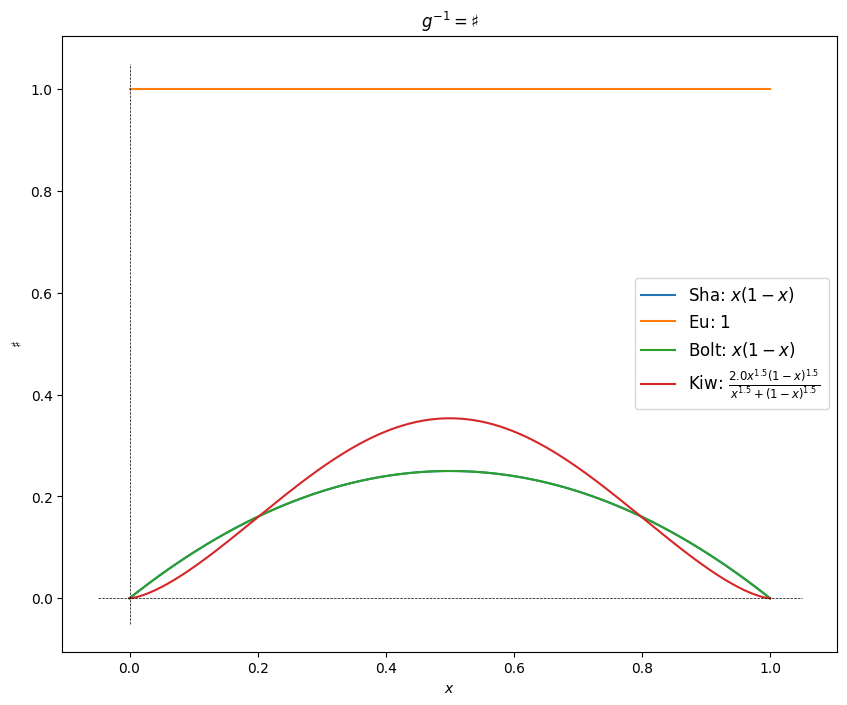

In [20]:
sharp_title = "$g^{-1} = \\sharp$"
strat_label = f"${sp.latex(x)}$"

sh_ylabel = "$\\sharp$"

ep = 0.08

A.plot_method(A.sharps, A.simsharps, title = sharp_title, xlabel = strat_label, ylabel = sh_ylabel, xDomain = A.R, figsize = (10, 8))



## Games and dynamics

### Mixed extension of NFG

In [15]:
class NFG():
    """docstring for ClassName"""
    def __init__(self, name, payoff_1, payoff_2):
        super(NFG, self).__init__()
        self.payoff_1 = payoff_1
        self.payoff_2 = payoff_2
        self.name = name
        self.simV = self.make_simV()


    def V(self, x1, x2):

        a1, b1, c1, d1 = self.payoff_1
        a2, b2, c2, d2 = self.payoff_2
    
        alpha1 = a1 + d1 - b1 - c1
        alpha2 = a2 + d2 - b2 - c2
        
        beta1 = b1 - d1
        gamma2 = c2 - d2
        
        return [alpha1 * x2 + beta1, alpha2 * x1 + gamma2]

    def make_simV(self):

        a1, b1, c1, d1 = self.payoff_1
        a2, b2, c2, d2 = self.payoff_2
    
        alpha1 = a1 + d1 - b1 - c1
        alpha2 = a2 + d2 - b2 - c2
        
        beta1 = b1 - d1
        gamma2 = c2 - d2
        
        return [alpha1 * y + beta1, alpha2 * x + gamma2] 

In [16]:
# matching pennies
MP = NFG( "matching pennies", [1, -1, -1, 1], [-1, 1, 1, -1] )

In [17]:
MP.simV

[4*y - 2, 2 - 4*x]

In [18]:
# PD
PD = NFG( "prisoner dilemma", [2, 0, 3, 1], [2, 3, 0, 1] )

In [19]:
PD.simV

[-1, -1]

In [20]:
# harmonic
HA = NFG( "harmonic", [1, -1, 0, 0], [-1, 1, 0, -1] )

In [21]:
HA.simV

[2*y - 1, 1 - 3*x]

In [22]:
# siege
SI = NFG( "siege", [-3, 2, 0, 0], [1, -4, -1, 0])

In [23]:
SI.simV

[2 - 5*y, 6*x - 1]

## Continuous games

### Cournot competition

In [24]:
cost = 1/4
cournot_eq = (1-cost)/3

simV_cournot = [1 - cost - 2 * x - y, 1 - cost - 2 * y - x]

def V_cournot(x1, x2):
    return [1 - cost - 2 * x1 - x2, 1 - cost - 2 * x2 - x1]

In [31]:
simV_cournot

[-2*x - y + 0.75, -x - 2*y + 0.75]

In [32]:
def V_test(x1, x2):
    return [x1*x2, x1-x2]

## Master dynamics

## Initial points

In [33]:
time = np.linspace(0, 100, 100000)

epsilon = 1e-3

init_generator = np.linspace(epsilon, 1-epsilon, 6)

initial_points = [ p for p in product(init_generator, init_generator) ]

In [34]:
def ftrl(var, time, sharp, payfield):
        
    x1, x2 = var
    V1, V2 = payfield(x1, x2)
        
    F1 = sharp(x1) * V1
    F2 = sharp(x2) * V2
        
    return [F1, F2]

In [35]:
# class DYN():
#     """docstring for ClassName"""
#     def __init__(self, game_name, payfield, legendre):
        
#         self.L = legendre
#         self.V = payfield
#         self.game_name = game_name

#         self.sols = [  ]  
#         for sh in self.L.sharps:
#             self.sols.append( [ odeint(ftrl, p, time, args=(sh, self.V) ) for p in initial_points ]  )

#     def make_plots(self):
        
#         nRows = len(self.L.regularizers)
#         fig, axs = plt.subplots(nRows, 1, figsize=(5, 5) )
#         axs = axs.flatten()

#         for i, ax in enumerate(axs):
#             [ax.plot(sol[:, 0], sol[:, 1], 'k', linewidth=0.5) for sol in sols[i] ]
#             plt.xlabel("x1")
#             plt.ylabel("x2")
#             plt.xlim(0,1)
#             plt.ylim(0,1)
#             plt.title(f"{self.game_name} - {A.reglabels[i]}")
#             plt.show()

In [36]:
for i, sh in enumerate(A.simsharps):
    print(reglabels[i], ":", sh)

Sha : x*(1 - x)
Eu : 1
Bolt : x*(1 - x)
Kiw : 2.0*x**1.5*(1 - x)**1.5/(x**1.5 + (1 - x)**1.5)


## Experiments

In [37]:
def make_plots(sharp_index, payfield, name, plot_point = False, point = 0):
    
    sols = [ odeint(ftrl, p, time, args=(A.sharps[sharp_index], payfield)) for p in initial_points ]
    
    [plt.plot(sol[:, 0], sol[:, 1], 'k', linewidth=0.5) for sol in sols]
    
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(f"{name} - {A.reglabels[sharp_index]}")

    if plot_point:
        plt.plot(*point, "ko")
    plt.show()
    #return sols
        
    

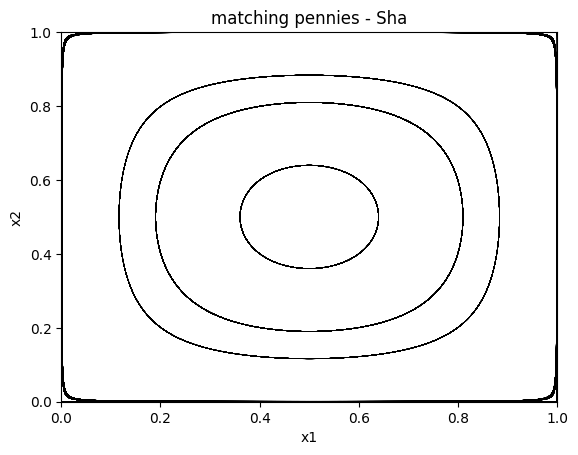

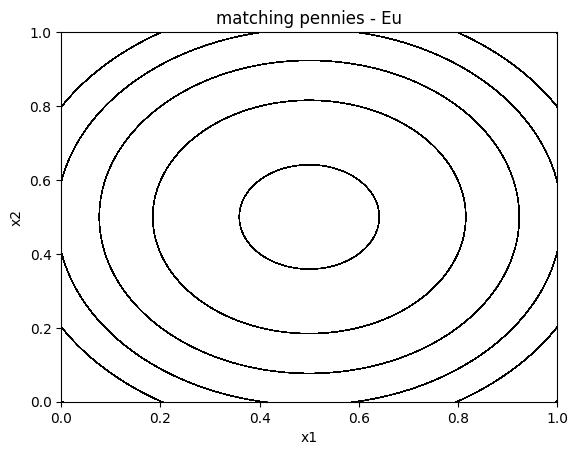

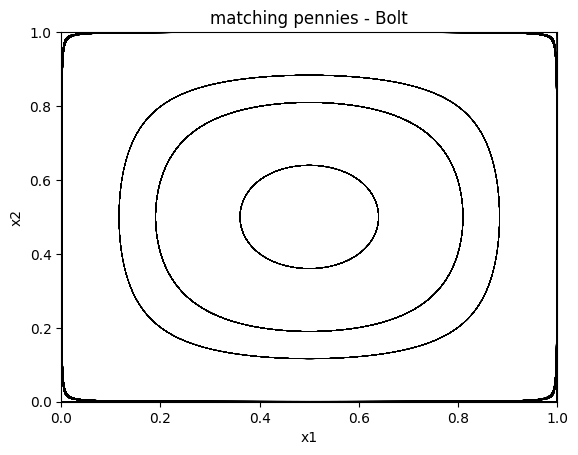

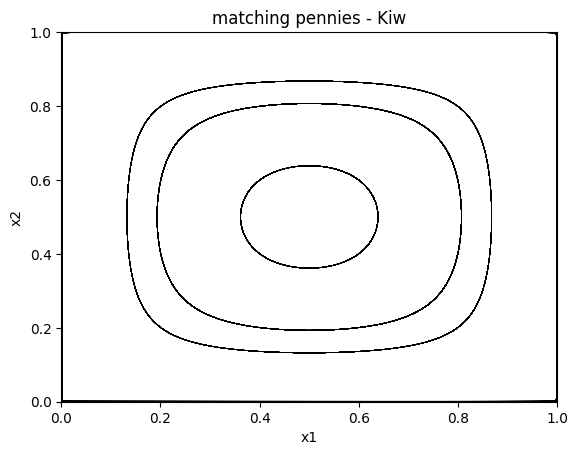

In [38]:
for i, h in enumerate(A.regularizers):
    make_plots(i, MP.V, MP.name)

/var/folders/nr/_pc5sgrn7833hcljbr9b58680000gn/T/ipykernel_91082/4234170298.py:3: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sols = [ odeint(ftrl, p, time, args=(A.sharps[sharp_index], payfield)) for p in initial_points ]


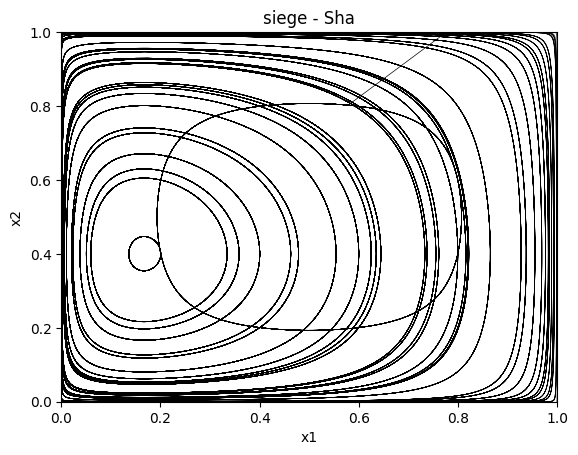

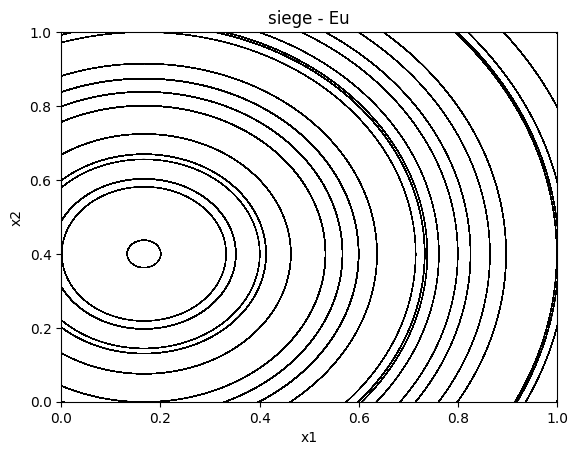

/usr/local/Cellar/python-matplotlib/3.9.0/libexec/lib/python3.12/site-packages/matplotlib/axes/_base.py:2957: RuntimeWarning: overflow encountered in scalar subtract
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


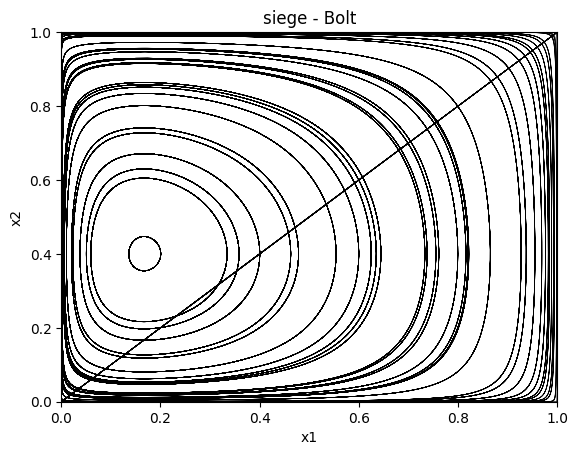

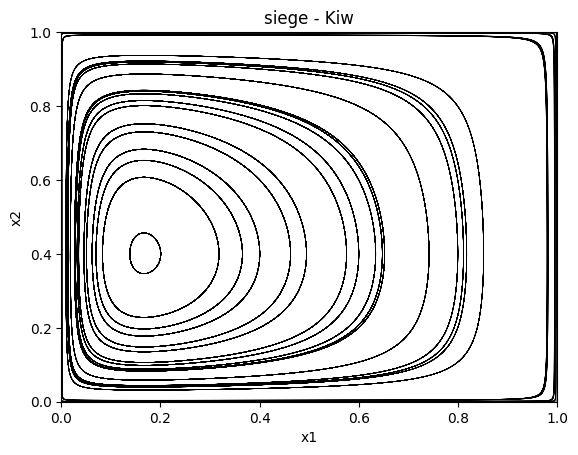

In [39]:
for i, h in enumerate(A.regularizers):
    make_plots(i, SI.V, SI.name)

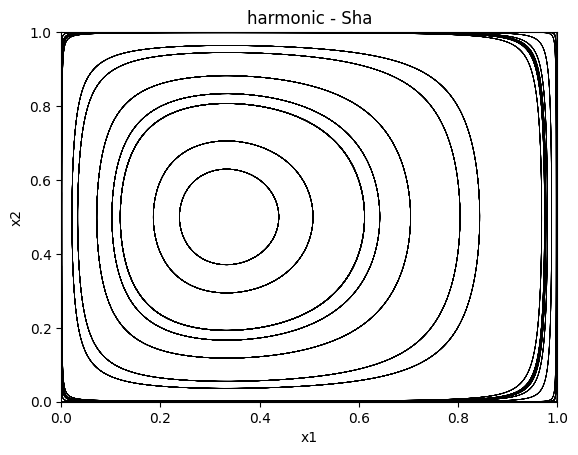

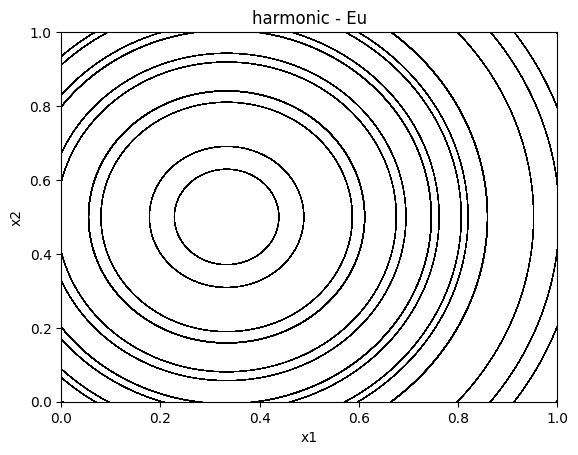

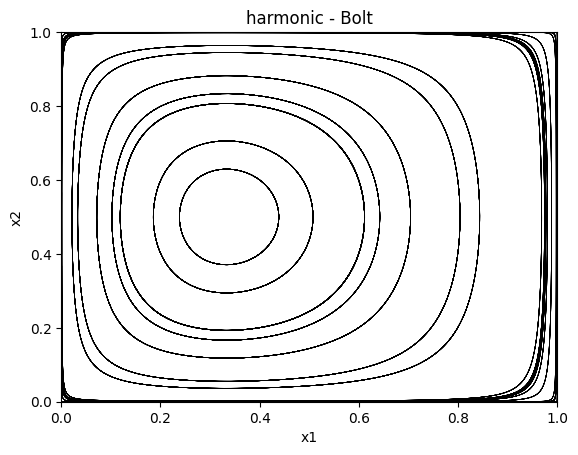

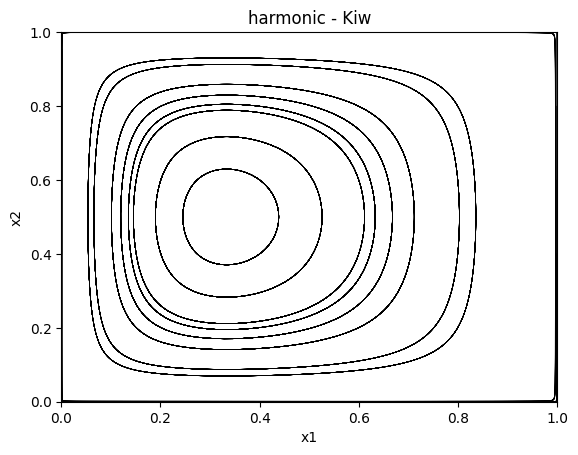

In [40]:
for i, h in enumerate(A.regularizers):
    make_plots(i, HA.V, HA.name)

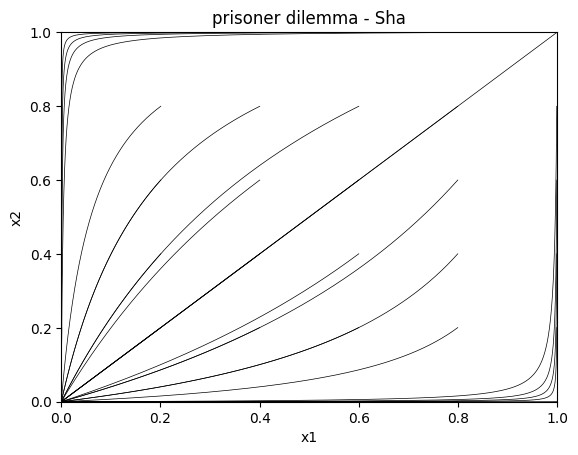

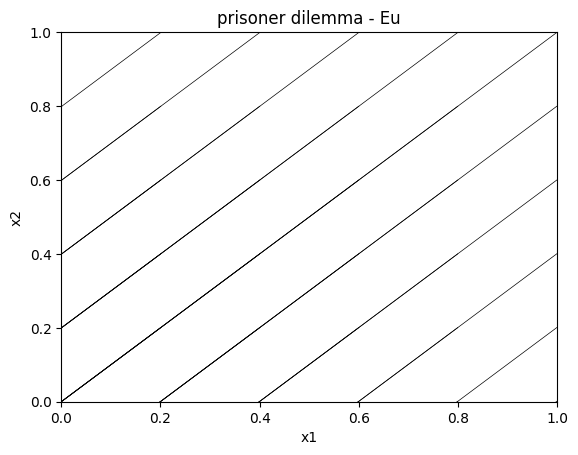

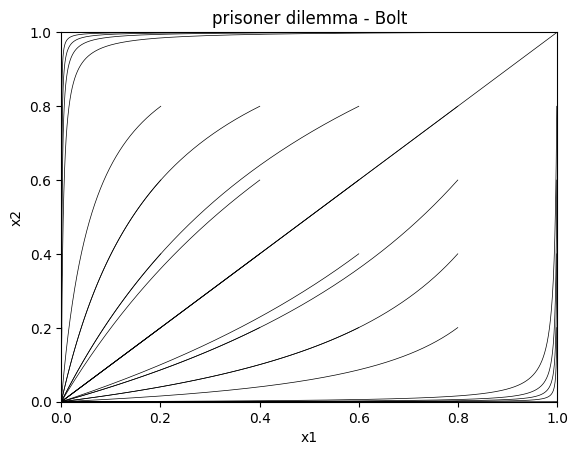

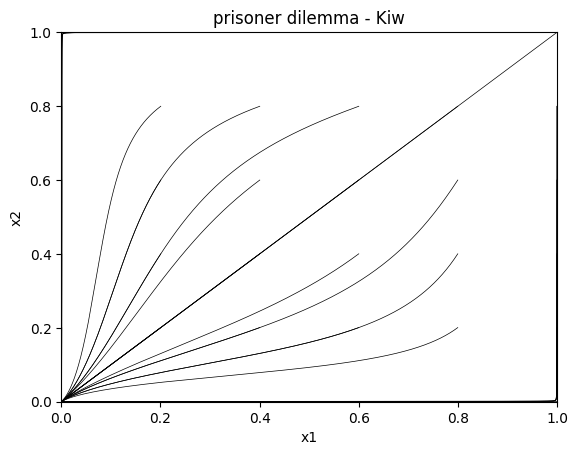

In [41]:
for i, h in enumerate(A.regularizers):
    make_plots(i, PD.V, PD.name)

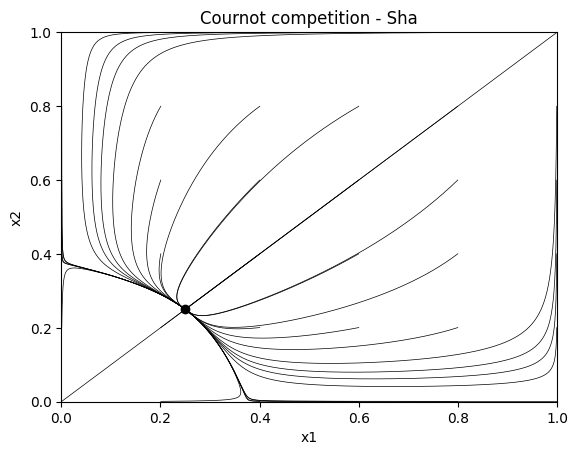

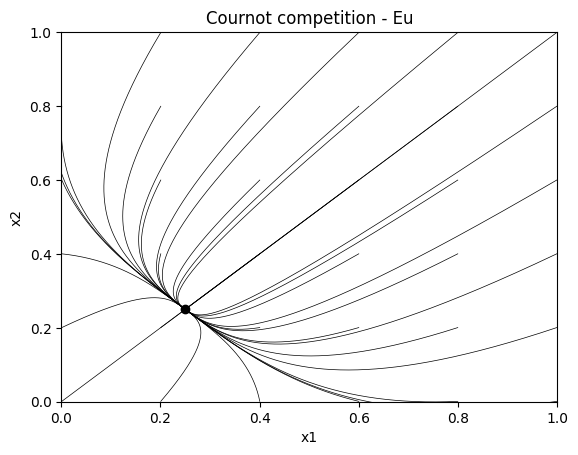

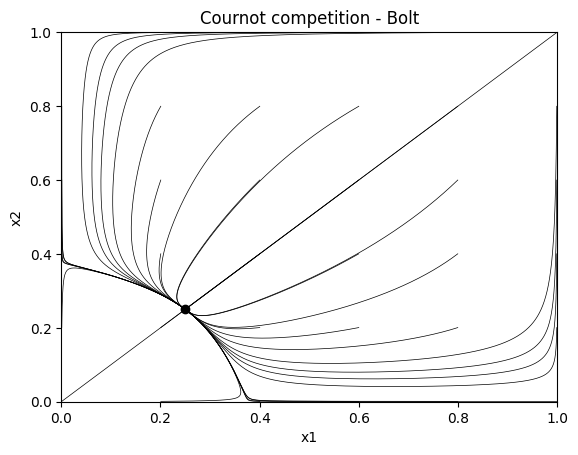

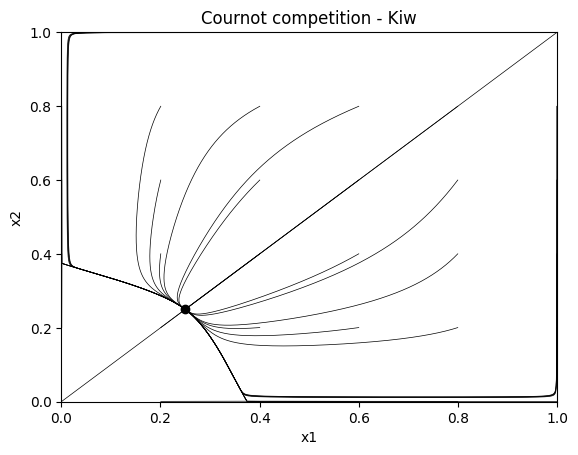

In [42]:
for i, h in enumerate(A.regularizers):
    make_plots(i, V_cournot, "Cournot competition", plot_point = True, point = (cournot_eq, cournot_eq))

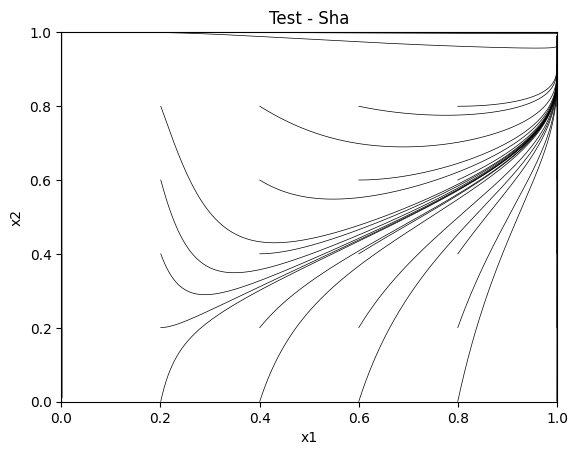

/var/folders/nr/_pc5sgrn7833hcljbr9b58680000gn/T/ipykernel_91082/4234170298.py:3: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sols = [ odeint(ftrl, p, time, args=(A.sharps[sharp_index], payfield)) for p in initial_points ]


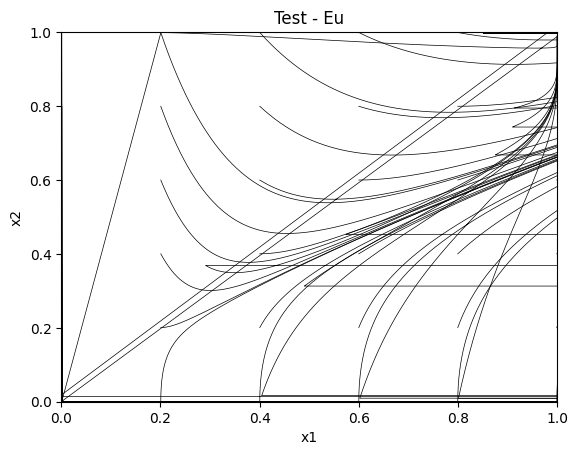

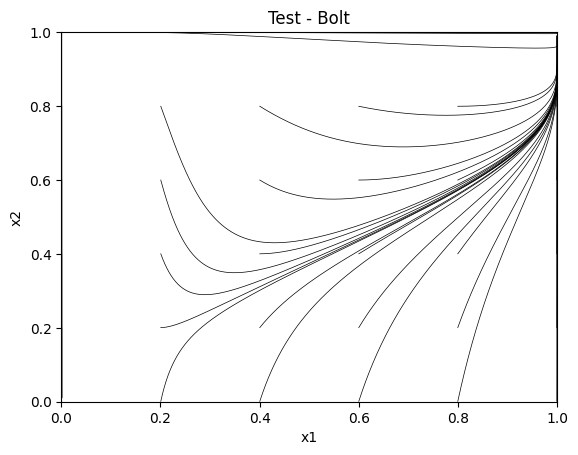

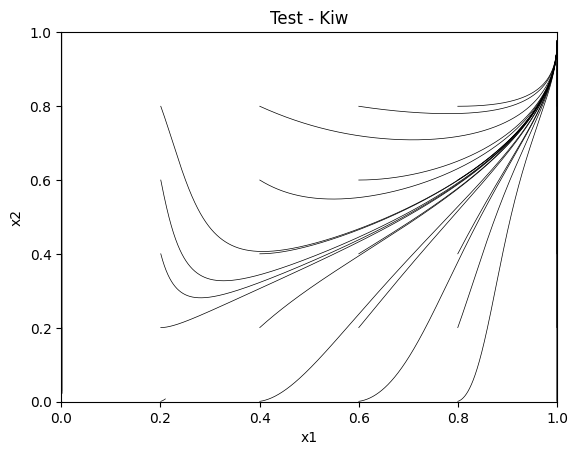

In [43]:
for i, h in enumerate(A.regularizers):
    make_plots(i, V_test, "Test", plot_point = False)

## end
---

## Co-differential and differential

In [44]:
# Legendre class
A

In [45]:
# codifferential of payoff 1-form
def codiff(sim_payfield, regularizer_index):

    h2 = A.simregularizers2[regularizer_index]
    h3 = A.simregularizers3[regularizer_index]
    
    return sum([   sp.diff( sim_payfield[i], simvars[i] ) / h2.subs(x, simvars[i]) - 1 / 2 * sim_payfield[i] * (h3/(h2**2)).subs(x, simvars[i]) for i in [0,1]   ]) 

In [46]:
# differential of payoff 1-form

def form_diff(sim_payfield):
    return sp.diff( sim_payfield[0], simvars[1] ) - sp.diff( sim_payfield[1], simvars[0] ) 

In [47]:
codiff_MP_sha = codiff(MP.simV, 0)
codiff_MP_sha

-(1.0 - 2.0*x)*((1 - y)**(-2) - 1/y**2)/(1/(1 - y) + 1/y)**2 - (2.0*y - 1.0)*((1 - x)**(-2) - 1/x**2)/(1/(1 - x) + 1/x)**2

In [49]:
# CO-EXACT matching pennies
sp.simplify(codiff_MP_sha)

0

In [54]:
# EXACT prisoner dilemma
form_diff(PD.simV)

0

In [55]:
# CO-EXACT harmonic; expected not, because this is generalized harmonic
sp.simplify( codiff(HA.simV, 0))

x*(1.0*y - 0.5)

## As expected, generalized harmonic game is not incompressible wrt the entropic regularizer; should solve ODE to find suitable regularizer

$$ \frac{h'''}{(h'')^2} (x) = ax-1 $$ 

Standard entropic  for $a = 2$.

In [51]:
print(MP.name)
for i, h in enumerate(A.regularizers):
    print(f"{ A.reglabels[i]}: δV = { sp.simplify( codiff(MP.simV, i) ) } ")

matching pennies
Sha: δV = 0 
Eu: δV = 0 
Bolt: δV = 0 
Kiw: δV = 3.0*(x**0.5*(1 - x)**0.5*(-x**2.5 + (1 - x)**2.5)*(2.0*y - 1.0)*(y**1.5 + (1 - y)**1.5)**2 - y**0.5*(1 - y)**0.5*(2.0*x - 1.0)*(x**1.5 + (1 - x)**1.5)**2*(-y**2.5 + (1 - y)**2.5))/((x**1.5 + (1 - x)**1.5)**2*(y**1.5 + (1 - y)**1.5)**2) 


In [56]:
print(PD.name)
for i, h in enumerate(A.regularizers):
    print(f"{ A.reglabels[i]}: δV = { sp.simplify( codiff(PD.simV, i) ) } ")

prisoner dilemma
Sha: δV = 1.0*x + 1.0*y - 1.0 
Eu: δV = 0 
Bolt: δV = 1.0*x + 1.0*y - 1.0 
Kiw: δV = -2.0*(0.75/x**2.5 - 0.75/(1 - x)**2.5)/(x**(-1.5) + (1 - x)**(-1.5))**2 - 2.0*(0.75/y**2.5 - 0.75/(1 - y)**2.5)/(y**(-1.5) + (1 - y)**(-1.5))**2 


In [57]:
print(HA.name)
for i, h in enumerate(A.regularizers):
    print(f"{ A.reglabels[i]}: δV = { sp.simplify( codiff(HA.simV, i) ) } ")

harmonic
Sha: δV = x*(1.0*y - 0.5) 
Eu: δV = 0 
Bolt: δV = x*(1.0*y - 0.5) 
Kiw: δV = 3.0*(x**0.5*(1 - x)**0.5*(-x**2.5 + (1 - x)**2.5)*(1.0*y - 0.5)*(y**1.5 + (1 - y)**1.5)**2 - y**0.5*(1 - y)**0.5*(1.5*x - 0.5)*(x**1.5 + (1 - x)**1.5)**2*(-y**2.5 + (1 - y)**2.5))/((x**1.5 + (1 - x)**1.5)**2*(y**1.5 + (1 - y)**1.5)**2) 


In [53]:
print("Cournot")
for i, h in enumerate(A.regularizers):
    print(f"{ A.reglabels[i]}: δV = { sp.simplify( codiff(simV_cournot, i) ) } ")

Cournot
Sha: δV = 4.0*x**2 + 2.0*x*y - 4.25*x + 4.0*y**2 - 4.25*y + 0.75 
Eu: δV = -4 
Bolt: δV = 4.0*x**2 + 2.0*x*y - 4.25*x + 4.0*y**2 - 4.25*y + 0.75 
Kiw: δV = (3.0*x**0.5*(1 - x)**0.5*(x**2.5 - (1 - x)**2.5)*(y**1.5 + (1 - y)**1.5)**2*(1.0*x + 0.5*y - 0.375) - 4.0*x**1.5*(1 - x)**1.5*(x**1.5 + (1 - x)**1.5)*(y**1.5 + (1 - y)**1.5)**2 + 3.0*y**0.5*(1 - y)**0.5*(x**1.5 + (1 - x)**1.5)**2*(y**2.5 - (1 - y)**2.5)*(0.5*x + 1.0*y - 0.375) - 4.0*y**1.5*(1 - y)**1.5*(x**1.5 + (1 - x)**1.5)**2*(y**1.5 + (1 - y)**1.5))/((x**1.5 + (1 - x)**1.5)**2*(y**1.5 + (1 - y)**1.5)**2) 
